In [1]:
import sys
import argparse
import random
import numpy as np 
import time
import math
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Some constants -- "heads" is 1 and "tails" is 0
HEADS = 1
TAILS = 0

# reading the number of trials on command line
no_of_trials = 1000000


In [21]:
# assign a random value for the probability of seeing a "1" (p1), "2" (p2) or "3" (p3) for 
# the 3-sided unfair dice such that (p1, p2, p3) is uniformly distributed over the surface
# p1+p2+p3 = 1, where p1, p2, p3 are non-negative real numbers
prob_of_one = np.random.uniform()
prob_of_two = np.random.uniform()
prob_of_three= 1 - prob_of_one-prob_of_two 
    

In [22]:
# This function simulates a single toss of the unfair 3-sided dice
def toss_of_three_sided_unfair_dice():
    x = np.random.uniform()
    if (x < prob_of_one) :
        return 1
    else :
        if (x < prob_of_two) :
            return 2
        else :
            return 3

In [23]:
def simulate_fair_coin_from_unfair_three_sided_dice() :
    # FILL Code here
    # figure out how to convert the outcome of the unfair 3-sided dice
    # into an outcome from a Fair Coin
    toss1 = toss_of_three_sided_unfair_dice()
    toss2 = toss_of_three_sided_unfair_dice()
    
    # repeat the unfair coin toss if toss1 and toss2 are the same
    while (toss1 == toss2) :
        toss1 = toss_of_three_sided_unfair_dice()
        toss2 = toss_of_three_sided_unfair_dice()
        
    # if toss1 is HEADS and toss2 is TAILS we output (Fair) Heads
    # if toss1 is TAILS and toss2 is HEADS we output (Fair) Tails
    if (((toss1 == 1) and (toss2 == 2)) or ((toss1 == 1) and (toss2 == 3)) or ((toss1 == 2) and (toss2 == 3))) :
        return HEADS
    else :
        return TAILS
    


In [24]:
# get a U.I.I.D RV by making the unfair three sided dice into a fair coin... and tossing the 
# resulting fair-coin 32 times to get discrete RV that is uniformly distributed over the 
# integers in [0, 2^{32}-1]... dividing the resulting integer by 2^{32}-1 gives us (effectively)
# a U.I.I.D. RV
def get_uiid_rvs_by_tossing_the_unfair_three_sided_dice_32_times() :
    result = 0
    for i in range(0, 32) :
        if (simulate_fair_coin_from_unfair_three_sided_dice() == HEADS) :
            result = result | (1 << i)
        else :
            result = result | (0 << i)
    return float(result/(pow(2,32)-1))

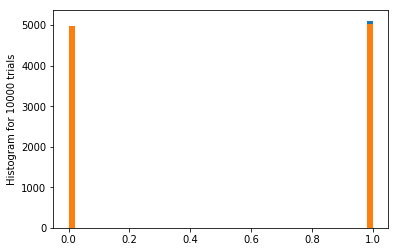

In [26]:
# plotting the histogram that results from making the unfair coin into a fair coin
y = []
local_no_trials = int(no_of_trials/100)
for i in range(0,local_no_trials) : 
    y.extend([simulate_fair_coin_from_unfair_three_sided_dice()])
    
plt.hist(y, bins=50)
plt.ylabel('Histogram for ' + str(local_no_trials) + ' trials')
plt.show()

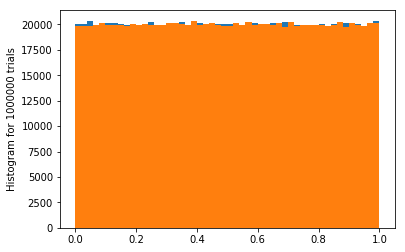

In [28]:
z = []
for i in range(0,no_of_trials) :
    z.extend([get_uiid_rvs_by_tossing_the_unfair_three_sided_dice_32_times()])
plt.hist(z, bins=50)
plt.ylabel('Histogram for ' + str(no_of_trials) + ' trials')
plt.show()

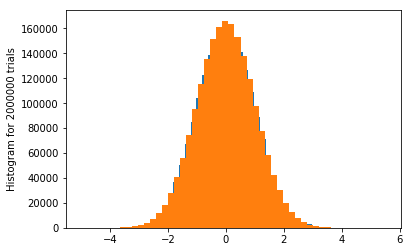

In [30]:
a = []
for i in range(0,no_of_trials) :
    p = get_uiid_rvs_by_tossing_the_unfair_three_sided_dice_32_times()
    q = get_uiid_rvs_by_tossing_the_unfair_three_sided_dice_32_times()
    theta = 2*math.pi*p 
    r = np.sqrt(-2*math.log(q))
    a.extend([r*math.cos(theta)])
    a.extend([r*math.sin(theta)])
plt.hist(a, bins=50)
plt.ylabel('Histogram for ' + str(2*no_of_trials) + ' trials')
plt.show()